In [1]:
%matplotlib inline

from IPython.display import Image
from IPython.core.pylabtools import figsize, getfigs

# imports basicos
import numpy as np
import scipy as sp
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import math
import sys
import traceback

# seaborn
# import seaborn as sns
# sns.set()

# from pandas.io.pytables import HDFStore

figsize(11, 9)
plt.style.use('ggplot')
pd.set_option('display.max_columns',300)
pd.set_option('display.width', 4000)
# plt.xkcd()  # Yes...

#needed to render in notebook


In [45]:
def gaussian_multiply(g1, g2):
    mu1, var1 = g1
    mu2, var2 = g2
    mean = (var1*mu2 + var2*mu1) / (var1 + var2)
    variance = (var1 * var2) / (var1 + var2)
    return (mean, variance)


# def update(prior, measurement):
#     x, P = prior        # mean and variance of prior
#     z, R = measurement  # mean and variance of measurement
    
#     y = z - x        # residual
#     K = P / (P + R)  # Kalman gain

#     x = x + K*y           # posterior
#     P = (P * R) / (P + R) # posterior variance
#     return x, P

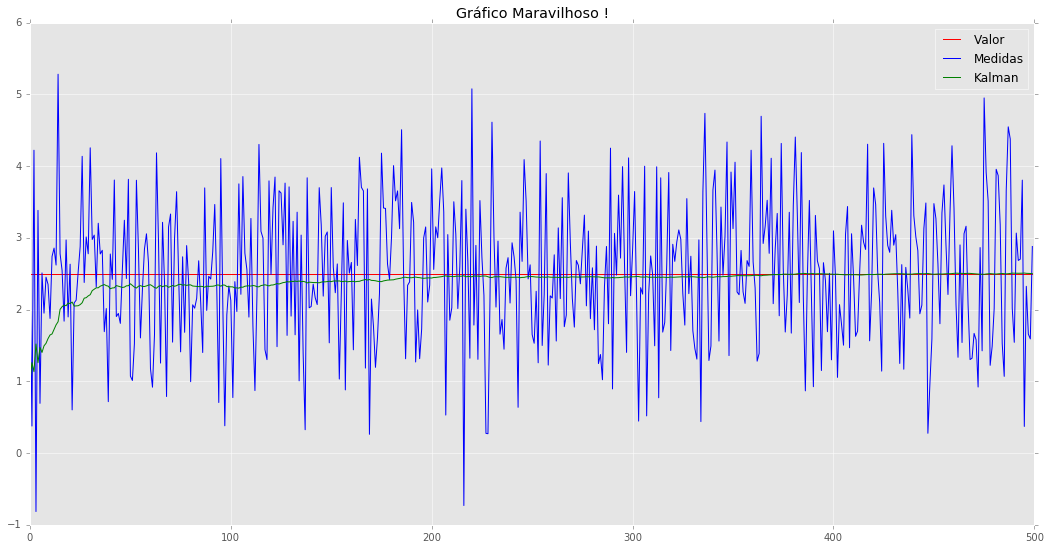

In [44]:
#
#  TESTE ESTATICO ->  VALOR CONSTANTE 
#

kalman = []

sensor_var = 1.0
process_var = 0.2
actual_value = 2.5

import random
measurements = []
for i in range(500):
    # static positon, just normal measurement gaussian erros
    measurements.append(random.gauss(actual_value,sensor_var))

x = 1.0 # chute inicial
var_x = process_var 

for measurement in measurements:
    # static positon -> Value DON'T CHANGE WITH TIME
    x = x
    var_x = var_x
    kalman.append(x)

    #update
    residual = measurement - x
    k_gain = var_x / (var_x + sensor_var) # Kalman gain
    x = x + (k_gain * residual)
    var_x = (1 - k_gain) * var_x
    
x_vals = np.arange(0,len(measurements))
figsize(18, 9)
plt.figure()
plt.plot(x_vals,[actual_value]*len(x_vals),"r-", label='Valor')
plt.plot(x_vals,measurements,"b-", label='Medidas')
plt.plot(x_vals,kalman,"g-" , label='Kalman')
plt.title(u'Gráfico Maravilhoso !')
plt.legend(loc=0)  # best->0 upper right->1 upper left->2 lower left->3 lower right->4 
plt.show()

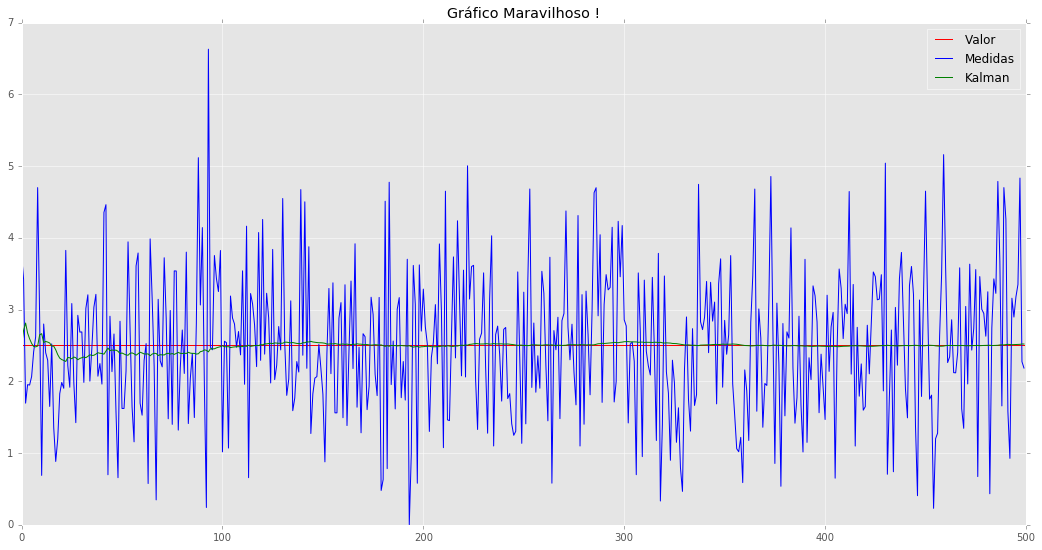

In [49]:
#
#  TESTE ESTATICO 2 ->  VALOR CONSTANTE 
#

kalman = []

measurement_var = 1.0
process_var = 0.2
actual_value = 2.5

import random
measurements = []
for i in range(500):
    # static positon, just normal measurement gaussian erros
    measurements.append(random.gauss(actual_value,measurement_var))

x = 2.5 # chute inicial
var_x = process_var 

for measurement in measurements:
    # static positon -> Value DON'T CHANGE WITH TIME
    x = x
    var_x = var_x
    kalman.append(x)

    #update
    x, var_x = gaussian_multiply((x,var_x),(measurement,measurement_var))
    
x_vals = np.arange(0,len(measurements))
figsize(18, 9)
plt.figure()
plt.plot(x_vals,[actual_value]*len(x_vals),"r-", label='Valor')
plt.plot(x_vals,measurements,"b-", label='Medidas')
plt.plot(x_vals,kalman,"g-" , label='Kalman')
plt.title(u'Gráfico Maravilhoso !')
plt.legend(loc=0)  # best->0 upper right->1 upper left->2 lower left->3 lower right->4 
plt.show()

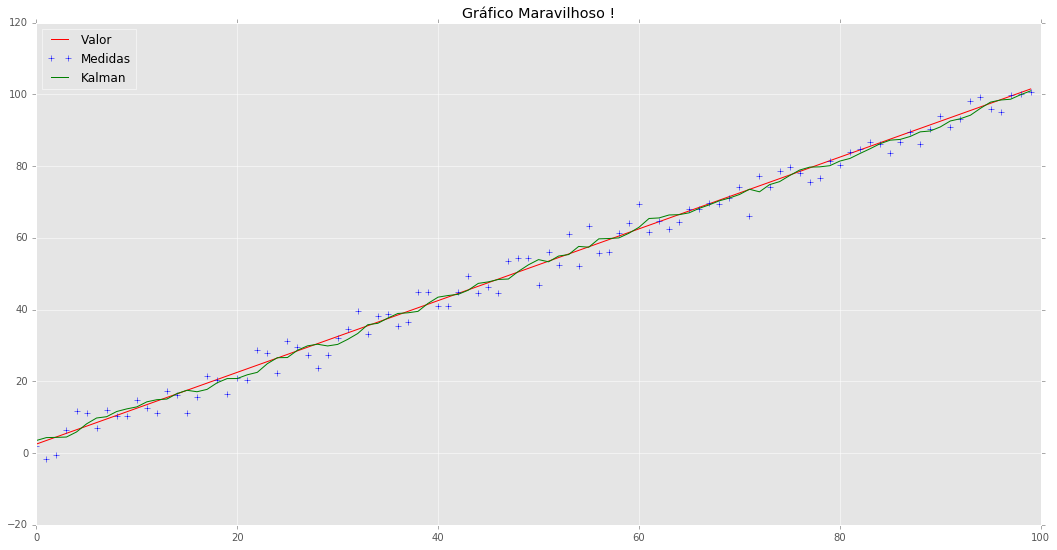

In [58]:
#
#  TESTE MOVIMENTO 
#

kalman = []

measurement_var = 3.0
process_var = 0.2
actual_value = 2.5
values = []
import random
measurements = []
for i in range(100):
    # static positon, just normal measurement gaussian erros
    v = actual_value+i
    values.append(v)
    measurements.append(random.gauss(v,measurement_var))

x = 2.5 # chute inicial
var_x = process_var 

for measurement in measurements:
    # static positon -> Value DON'T CHANGE WITH TIME
    x = x + 1
    var_x = var_x + process_var
    kalman.append(x)

    #update
    x, var_x = gaussian_multiply((x,var_x),(measurement,measurement_var))
    
x_vals = np.arange(0,len(measurements))
figsize(18, 9)
plt.figure()
plt.plot(x_vals,values,"r-", label='Valor')
plt.plot(x_vals,measurements,"b+", label='Medidas')
plt.plot(x_vals,kalman,"g-" , label='Kalman')
plt.title(u'Gráfico Maravilhoso !')
plt.legend(loc=0)  # best->0 upper right->1 upper left->2 lower left->3 lower right->4 
plt.show()